In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Content

The csv file contains 17 fields. The description of each field is as below:

1.Hotel_Address: Address of hotel.

Review_Date: Date when reviewer posted the corresponding review.

Average_Score: Average Score of the hotel, calculated based on the latest comment in the last year.

Hotel_Name: Name of Hotel

Reviewer_Nationality: Nationality of Reviewer

Negative_Review: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'

ReviewTotalNegativeWordCounts: Total number of words in the negative review.

Positive_Review: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'

ReviewTotalPositiveWordCounts: Total number of words in the positive review.

Reviewer_Score: Score the reviewer has given to the hotel, based on his/her experience

TotalNumberofReviewsReviewerHasGiven: Number of Reviews the reviewers has given in the past.

TotalNumberof_Reviews: Total number of valid reviews the hotel has.

Tags: Tags reviewer gave the hotel.

dayssincereview: Duration between the review date and scrape date.

AdditionalNumberof_Scoring: There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.

lat: Latitude of the hotel

lng: longtitude of the hotel

In [3]:
df = pd.read_csv('Hotel_Review.csv')
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


### Data Cleaning

In [5]:
#Removing duplicates from the dataset
print(sum(df.duplicated()))
df = df.drop_duplicates()
print('After removing Duplicates: {}'.format(df.shape))


526
After removing Duplicates: (515212, 17)


# EDA

In [4]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [9]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans_df = nans(df)
nans_df = nans_df[['Hotel_Name','lat','lng']]
print(f'No of missing values in the dataset: {len(nans_df)}')

No of missing values in the dataset: 3268


In [11]:
nans_df.Hotel_Name.describe()


count                                    3268
unique                                     17
top       Fleming s Selection Hotel Wien City
freq                                      658
Name: Hotel_Name, dtype: object

In [15]:
# let's look at the reviews frequency of the missing Hotels.
nans_df.Hotel_Name.value_counts()

Fleming s Selection Hotel Wien City                 658
Hotel City Central                                  563
Hotel Atlanta                                       389
Maison Albar Hotel Paris Op ra Diamond              290
Hotel Daniel Vienna                                 245
Hotel Pension Baron am Schottentor                  223
Austria Trend Hotel Schloss Wilhelminenberg Wien    194
Derag Livinghotel Kaiser Franz Joseph Vienna        147
NH Collection Barcelona Podium                      146
City Hotel Deutschmeister                            93
Hotel Park Villa                                     61
Cordial Theaterhotel Wien                            57
Holiday Inn Paris Montmartre                         55
Roomz Vienna                                         49
Mercure Paris Gare Montparnasse                      37
Renaissance Barcelona Hotel                          33
Hotel Advance                                        28
Name: Hotel_Name, dtype: int64

instead of removing the Nan values from the dataset, Try to fill the Nan values with the similar Hotel_Addresses lat, lng values in the dataset. If the Hotel_Address is matched with the other rows(i.e Nan valued rows) in the dataset, Fill the Nan values in the dataset with the matched values(i.e., lat,lng).

Let's look into the datset to find the similar Hotel information is availble.

In [17]:
print('Fleming s Selection Hotel Wien City: {}'.format(len(df.loc[df.Hotel_Name == 'Fleming s Selection Hotel Wien City'])))
print('Hotel City Central: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel City Central'])))
print('Hotel Atlanta: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Atlanta'])))
print('Maison Albar Hotel Paris Op ra Diamond: {}'.format(len(df.loc[df.Hotel_Name == 'Maison Albar Hotel Paris Op ra Diamond'])))
print('Hotel Daniel Vienna: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Daniel Vienna'])))
print('Hotel Pension Baron am Schottentor: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Pension Baron am Schottentor'])))
print('Austria Trend Hotel Schloss Wilhelminenberg Wien: {}'.format(len(df.loc[df.Hotel_Name == 'Austria Trend Hotel Schloss Wilhelminenberg Wien'])))
print('Derag Livinghotel Kaiser Franz Joseph Vienna: {}'.format(len(df.loc[df.Hotel_Name == 'Derag Livinghotel Kaiser Franz Joseph Vienna'])))
print('NH Collection Barcelona Podium: {}'.format(len(df.loc[df.Hotel_Name == 'NH Collection Barcelona Podium'])))
print('City Hotel Deutschmeister: {}'.format(len(df.loc[df.Hotel_Name == 'City Hotel Deutschmeister'])))
print('Hotel Park Villa: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Park Villa'])))
print('Cordial Theaterhotel Wien: {}'.format(len(df.loc[df.Hotel_Name == 'Cordial Theaterhotel Wien'])))
print('Holiday Inn Paris Montmartre: {}'.format(len(df.loc[df.Hotel_Name == 'Holiday Inn Paris Montmartre'])))
print('Roomz Vienna: {}'.format(len(df.loc[df.Hotel_Name == 'Roomz Vienna'])))
print('Mercure Paris Gare Montparnasse: {}'.format(len(df.loc[df.Hotel_Name == 'Mercure Paris Gare Montparnasse'])))
print('Renaissance Barcelona Hotel: {}'.format(len(df.loc[df.Hotel_Name == 'Renaissance Barcelona Hotel'])))
print('Hotel Advance: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Advance'])))

Fleming s Selection Hotel Wien City: 658
Hotel City Central: 563
Hotel Atlanta: 389
Maison Albar Hotel Paris Op ra Diamond: 290
Hotel Daniel Vienna: 245
Hotel Pension Baron am Schottentor: 223
Austria Trend Hotel Schloss Wilhelminenberg Wien: 194
Derag Livinghotel Kaiser Franz Joseph Vienna: 147
NH Collection Barcelona Podium: 146
City Hotel Deutschmeister: 93
Hotel Park Villa: 61
Cordial Theaterhotel Wien: 57
Holiday Inn Paris Montmartre: 55
Roomz Vienna: 49
Mercure Paris Gare Montparnasse: 37
Renaissance Barcelona Hotel: 33
Hotel Advance: 28


* From the above figures we see that the missing values and available values in the dataset are same.(i.e the inflat,lng values are not available in the entire dataset).
* For filling the lat,lng information of Hotel's by using this site [http://latlong.org/].

In [18]:
#latitude information of Hotels
loc_lat = {'Fleming s Selection Hotel Wien City':48.209270,
       'Hotel City Central':48.2136,
       'Hotel Atlanta':48.210033,
       'Maison Albar Hotel Paris Op ra Diamond':48.875343,
       'Hotel Daniel Vienna':48.1888,
       'Hotel Pension Baron am Schottentor':48.216701,
      'Austria Trend Hotel Schloss Wilhelminenberg Wien':48.2195,
      'Derag Livinghotel Kaiser Franz Joseph Vienna':48.245998,
      'NH Collection Barcelona Podium':41.3916,
      'City Hotel Deutschmeister':48.22088,
      'Hotel Park Villa':48.233577,
      'Cordial Theaterhotel Wien':48.209488,
      'Holiday Inn Paris Montmartre':48.888920,
      'Roomz Vienna':48.186605,
      'Mercure Paris Gare Montparnasse':48.840012,
      'Renaissance Barcelona Hotel':41.392673,
      'Hotel Advance':41.383308}

In [19]:
#longitude information of Hotels
loc_lng ={'Fleming s Selection Hotel Wien City':16.353479,
       'Hotel City Central':16.3799,
       'Hotel Atlanta':16.363449,
       'Maison Albar Hotel Paris Op ra Diamond':2.323358,
       'Hotel Daniel Vienna':16.3840,
       'Hotel Pension Baron am Schottentor':16.359819,
      'Austria Trend Hotel Schloss Wilhelminenberg Wien':16.2856,
      'Derag Livinghotel Kaiser Franz Joseph Vienna':16.341080,
      'NH Collection Barcelona Podium':2.1779,
      'City Hotel Deutschmeister':16.36663,
      'Hotel Park Villa':16.345682,
      'Cordial Theaterhotel Wien':16.351585,
      'Holiday Inn Paris Montmartre':2.333087,
      'Roomz Vienna':16.420643,
      'Mercure Paris Gare Montparnasse':2.323595,
      'Renaissance Barcelona Hotel':2.167494,
      'Hotel Advance':2.162828}

In [20]:
#filling the latitude information
df['lat'] = df['lat'].fillna(df['Hotel_Name'].apply(lambda x: loc_lat.get(x)))
#filling longitude information
df['lng'] = df['lng'].fillna(df['Hotel_Name'].apply(lambda x: loc_lng.get(x)))

In [21]:
df.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

In [24]:
df.describe(include='all')

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
count,515212,515212.000000,515212,515212.000000,515212,515212,515212,515212.000000,515212.000000,515212,515212.000000,515212.000000,515212.000000,515212,515212,515212.000000,515212.000000
unique,1493,NaN,731,NaN,1492,227,330011,NaN,NaN,412601,NaN,NaN,NaN,55242,731,NaN,NaN
top,163 Marsh Wall Docklands Tower Hamlets London ...,NaN,8/2/2017,NaN,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,NaN,NaN,No Positive,NaN,NaN,NaN,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days,NaN,NaN
freq,4789,NaN,2584,NaN,4789,245110,127757,NaN,NaN,35904,NaN,NaN,NaN,5101,2584,NaN,NaN
mean,NaN,498.416021,NaN,8.397767,NaN,NaN,NaN,18.540822,2744.698889,NaN,17.778256,7.164895,8.395532,NaN,NaN,49.432984,2.893972
std,NaN,500.668595,NaN,0.547952,NaN,NaN,NaN,29.693991,2318.090821,NaN,21.804541,11.039354,1.637467,NaN,NaN,3.461936,4.669732
min,NaN,1.000000,NaN,5.200000,NaN,NaN,NaN,0.000000,43.000000,NaN,0.000000,1.000000,2.500000,NaN,NaN,41.328376,-0.369758
25%,NaN,169.000000,NaN,8.100000,NaN,NaN,NaN,2.000000,1161.000000,NaN,5.000000,1.000000,7.500000,NaN,NaN,48.213810,-0.143372
50%,NaN,342.000000,NaN,8.400000,NaN,NaN,NaN,9.000000,2134.000000,NaN,11.000000,3.000000,8.800000,NaN,NaN,51.499981,0.019886
75%,NaN,660.000000,NaN,8.800000,NaN,NaN,NaN,23.000000,3633.000000,NaN,22.000000,8.000000,9.600000,NaN,NaN,51.516288,4.841163


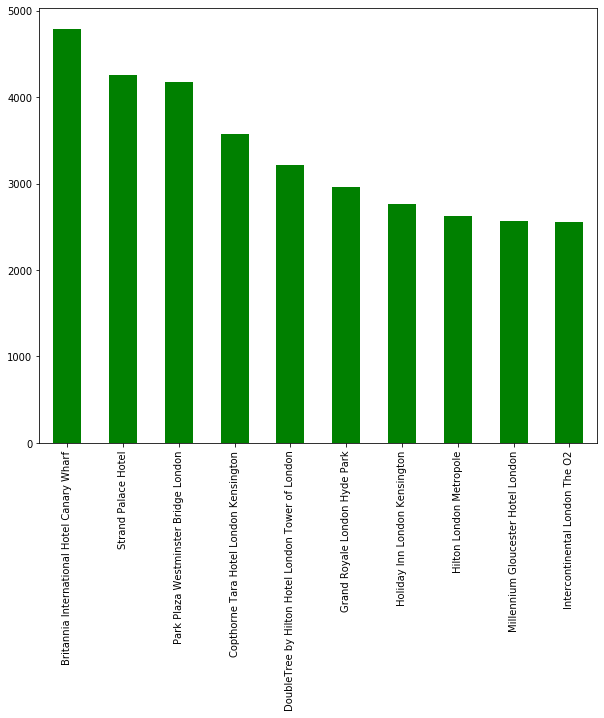

In [49]:
# Lets see the top ten most reviewed hotel

(df['Hotel_Name'].value_counts())[:10].plot(kind='bar', figsize=(10, 8), color = 'green');